<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#k-Means" data-toc-modified-id="k-Means-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><em>k</em>-Means</a></span><ul class="toc-item"><li><span><a href="#libary" data-toc-modified-id="libary-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>libary</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Elbow-Method" data-toc-modified-id="Elbow-Method-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Elbow Method</a></span></li></ul></li><li><span><a href="#2.-Hierarchical-Clustering" data-toc-modified-id="2.-Hierarchical-Clustering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Hierarchical Clustering</a></span><ul class="toc-item"><li><span><a href="#2.1-Modeling" data-toc-modified-id="2.1-Modeling-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.1 Modeling</a></span></li><li><span><a href="#2.2-Dendrogram" data-toc-modified-id="2.2-Dendrogram-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2 Dendrogram</a></span></li></ul></li><li><span><a href="#3.-DBSCAN" data-toc-modified-id="3.-DBSCAN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. DBSCAN</a></span></li></ul></div>

 In this notebook, we are going to learn three widely used clustering models.

<font color='red'>Question:</font> What are supervised learning and unsupervised learning?

Supervised learning

Supervised learning, as the name indicates, has the presence of a supervisor as a teacher. Basically supervised learning is when we teach or train the machine using data that is well labelled. Which means some data is already tagged with the correct answer. After that, the machine is provided with a new set of examples(data) so that the supervised learning algorithm analyses the training data(set of training examples) and produces a correct outcome from labelled data.

Unsupervised learning

Unsupervised learning is the training of a machine using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance. Here the task of the machine is to group unsorted information according to similarities, patterns, and differences without any prior training of data. 
Unlike supervised learning, no teacher is provided that means no training will be given to the machine. Therefore the machine is restricted to find the hidden structure in unlabeled data by itself. 


<font color='red'>Question:</font> Why unsupervised learning is important?

Unsupervised machine learning can identify previously unknown patterns in data. It can be easier, faster and less costly to use than supervised learning as unsupervised learning does not require the manual work associated with labeling data that supervised learning requires.

#  *k*-Means

## libary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

## Modeling

<font color='red'>Assignment:</font> Load the data in '../data/clustering.csv' into a DataFrame **df**, and plot the data in **df**.

In [2]:
#ls

<font color='red'>Question:</font> How many clusters do you think there are?

In [3]:
df = pd.read_csv('clustering.csv')
X = df

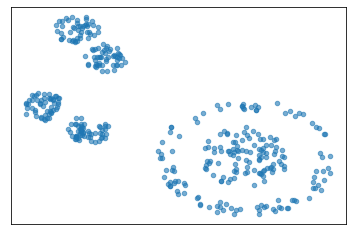

In [4]:
plt.scatter(df.x1, df.x2,  cmap="rainbow", s =  20, alpha=0.6)
plt.xticks([])
plt.yticks([])
ax = plt.gca() 
plt.show()

<font color='red'>Assignment:</font> Train a **KMeans** model with the data in **df**. Set **n_cluster** the number of clusters which you think is reasonable.


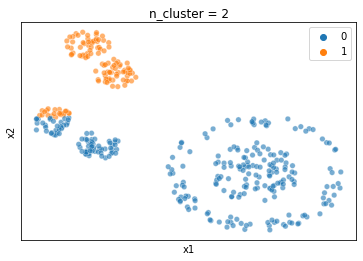

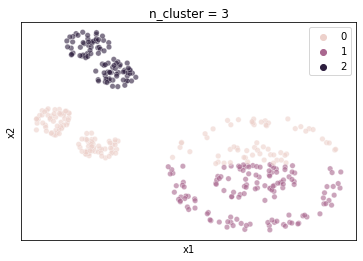

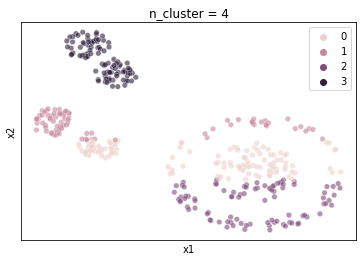

In [5]:
X = df
for n in range(2,5,1):
   
    cluster = KMeans(n_clusters = n
                    ,random_state = 0).fit(X) 
    y_pred = cluster.labels_ 
    #y_pred
    plt.figure
    sns.scatterplot(df.x1, df.x2, hue=y_pred, s =  30, alpha=0.6)
    title = 'n_cluster = {}'.format(n)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

<font color='red'>Question:</font> What information does the attribute **label_** of **KMeans** provide?

Ans: It provides predicted label for each data point.

<font color='red'>Assignment:</font> Visualize the clustering results. **Hint:** use **plt.scatter(x, y, c=z)**.

<font color='red'>Question:</font> Do you think the result is reasonable? What is the reason? How can you solve it? **Hint:** Re-plot the clustering results with **plt.axis('equal')**.

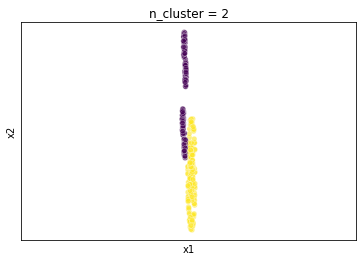

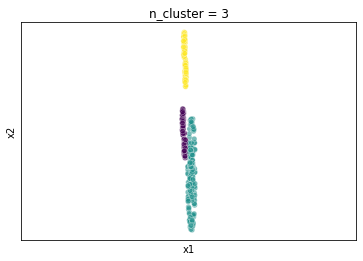

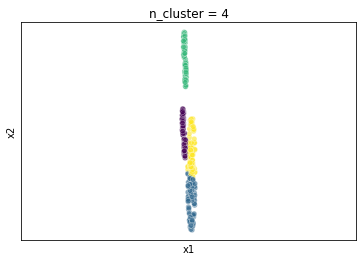

In [6]:
X = df

for n in range(2,5,1):
    
    steps = [('rescale',StandardScaler())
        ,('cluster',KMeans(n_clusters = n
                    ,random_state = 0))]
    
    pipe = Pipeline(steps)
    clf = pipe.fit(X)
    
    
    y_pred = clf[-1].labels_ 
    #y_pred
    plt.figure
    sns.scatterplot(df.x1, df.x2, c = y_pred, s =  30, alpha=0.6)
    plt.axis('equal')
    
    title = 'n_cluster = {}'.format(n)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    #ax = plt.gca() 
    plt.show()

<font color='red'>Assignment:</font> Rescale the data in **df** and assign them to a variable X. Re-do the above steps with X.

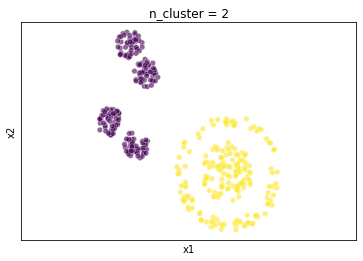

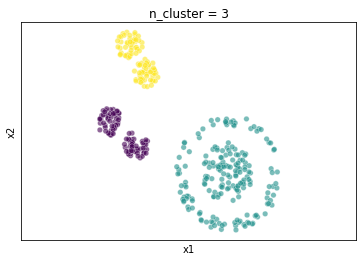

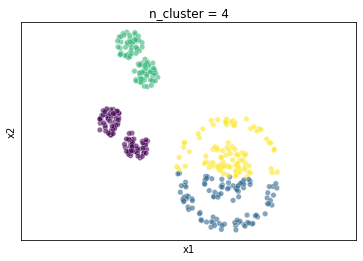

In [7]:
X = df
X = pd.DataFrame(StandardScaler().fit_transform(df))
X.columns = ['x1','x2']
    
for n in range(2,5,1):
    
    clf=KMeans(n_clusters = n
            ,random_state = 0).fit(X)
    

    y_pred = clf.labels_ 
    #y_pred
    plt.figure
    sns.scatterplot(X.x1, X.x2, c = y_pred, s =  30, alpha=0.6)
    plt.axis('equal')
    
    title = 'n_cluster = {}'.format(n)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    #ax = plt.gca() 
    plt.show()

<font color='red'>Question:</font> Do you think it is more reasonable now? Can you describe how **KMeans** works? How **centroids** are initialized and updated? How does the model determine which cluster a data point belongs to?


https://www.learnbymarketing.com/methods/k-means-clustering/#:~:text=K%2Dmeans%20clustering%20uses%20%E2%80%9Ccentroids,the%20points%20assigned%20to%20it.

K-means clustering uses “centroids”, K different randomly-initiated points in the data, and assigns every data point to the nearest centroid.  After every point has been assigned, the centroid is moved to the average of all of the points assigned to it.  Then the process repeats: every point is assigned to its nearest centroid, centroids are moved to the average of points assigned to it.  The algorithm is done when no point changes assigned centroid.

<font color='red'>Question:</font> What are the important hyperparameters for **KMeans**? How do they affect results?

https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3

class sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')


n_clusters: number of clusters to create

max_iter: 
This determines the number of iterations of, Assign and Optimize (moving the centroids).

There are n_init runs in general and each run iterates max_iter times, i.e., within a run, points will be assigned to different clusters and the loss calculated for max_iter times. If you keep max_iter at a higher value, then you are guaranteed that you have explored the entire feature space, but often this comes at the cost of diminishing returns.

n_init:

n_init = By default is 10 and so the algorithm will initialize the centroids 10 times and will pick the most converging value as the best fit. Increase this value to scan the entire feature space. Note if we provide the centroids, then the algorithm will only run once; in fact it will warn us about this at run time. If we set initial centroids or if we set the number of clusters to be more than what we expect (with the intention of consolidating some clusters later on, as discussed above), then we can leave this at the default.

## Elbow Method

<font color='red'>Question:</font> What information does attribute **inertia_** of **KMeans** provide?

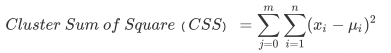

Inertia, also called cluster Sum of Square. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.



<font color='red'>Assignment:</font> Plot **inertia_** value versus **n_clusters**.

In [8]:
X = pd.DataFrame(StandardScaler().fit_transform(df),columns = ['x1','x2'])

In [9]:
n_clusters = range(1,11)
inertia = []

for n in n_clusters:
    cluster = KMeans(n_clusters = n
                    ,random_state = 2022).fit(X)
    single_inertia = cluster.inertia_
    inertia.append(single_inertia)

Text(0, 0.5, 'Inertia/Cluster Sum of Square')

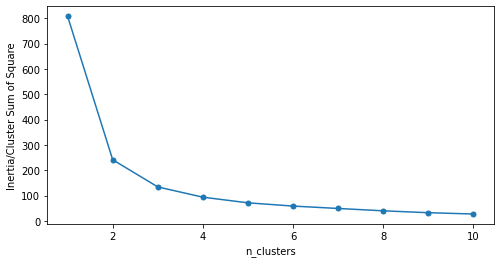

In [10]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11),inertia, marker="o", markersize =5)
plt.xlabel('n_clusters')
plt.ylabel('Inertia/Cluster Sum of Square')

<font color='red'>Question:</font> How many clusters (or which **k**) should we choose here? Is it consistent with what you found in the figure?

3 or 4.


<font color='red'>Question:</font> What is **Elbow Method**? Does it always work?

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

It does not always work.

# 2. Hierarchical Clustering

## 2.1 Modeling

<font color='red'>Assignment:</font> Train an **AgglomerativeClustering** model with **X**.

In [11]:
X = pd.DataFrame(StandardScaler().fit_transform(df),columns = ['x1','x2'])
hclf = AgglomerativeClustering(n_clusters=2).fit(X)
y_pred = hclf.labels_

<font color='red'>Assignment:</font> Visualize the clustering results.

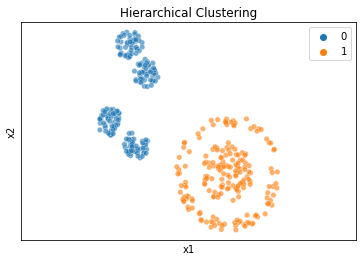

In [12]:
plt.figure
sns.scatterplot(X.x1, X.x2, hue = y_pred, s =30, alpha=0.6)
plt.axis('equal')

title = 'Hierarchical Clustering'
plt.title(title)
plt.xticks([])
plt.yticks([])
#ax = plt.gca() 
plt.show()

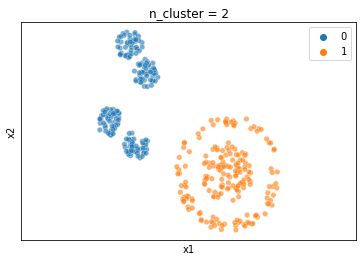

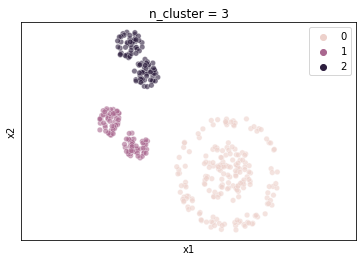

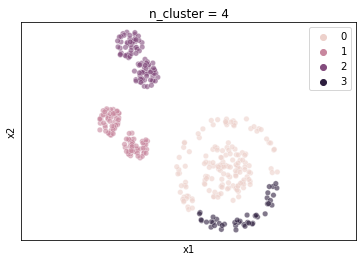

In [13]:
X = pd.DataFrame(StandardScaler().fit_transform(df),columns = ['x1','x2'])

for n in range(2,5,1):
    hclf=AgglomerativeClustering(n_clusters=n
                                 , affinity='euclidean'
                                 , memory=None
                                 , connectivity=None
                                 , compute_full_tree='auto'
                                 , linkage='ward'
                                 , distance_threshold=None
                                 , compute_distances=False).fit(X)
    

    y_pred = hclf.labels_ 
    #y_pred
    plt.figure
    sns.scatterplot(X.x1, X.x2, hue = y_pred, s =  30, alpha=0.6)
    plt.axis('equal')
    
    title = 'n_cluster = {}'.format(n)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

<font color='red'>Question:</font> How does hierarchecial clustering work?

https://www.simplilearn.com/tutorials/data-science-tutorial/hierarchical-clustering-in-r

Hierarchical clustering starts by treating each observation as a separate cluster.

Agglomerate clustering begins with each element as a separate cluster and merges them into larger clusters. 

The divisive clustering approach begins with a whole set composed of all the data points and divides it into smaller clusters. This can be done using a monothetic divisive method.

<font color='red'>Question:</font> What are the important hyperparameters for **AgglomerativeClustering**? How do they affect results?

The main hyperparameter of this mechanism is: n_clusters (the number of clusters) — data are successively merged, one at a time, until there are n clusters remaining.

## 2.2 Dendrogram

**Example:** Plot dendrogram of hierarchical clustering results. Here we use **linkage** in **scipy** to reproduce the results of **AgglomerativeClustering** model.

Text(0, 0.5, 'distance')

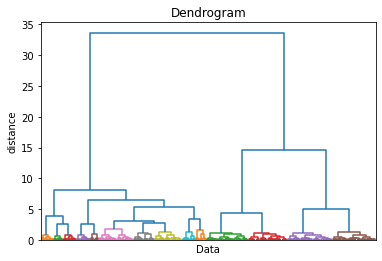

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X, 'ward')
dendrogram(linkage_matrix, color_threshold=2.0)
plt.title('Dendrogram')
plt.xlabel('Data')
plt.xticks([])
plt.ylabel('distance')

# 3. DBSCAN

<font color='red'>Assignment:</font> Train a **DBSCAN** model with **X**.

In [15]:
# iteration - find hyperparameters

res = []
for eps in np.arange(0.001,1,0.05):
    
    for min_samples in range(2,10):
        dbscan =DBSCAN(eps = eps, min_samples = min_samples)
        
        dbscan.fit(X)
        # record n_cluster with certain hyperparameter（-1: abnormal/jumping points）
        n_clusters = len([i for i in set(dbscan.labels_) if i != -1])
        # number of jumping points
        outliners = np.sum(np.where(dbscan.labels_ == -1, 1,0))
        # sample number in cluster
        stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
        res.append({'eps':eps,'min_samples':min_samples,'n_clusters':n_clusters,'outliners':outliners,'stats':stats})
       
df_dbscan = pd.DataFrame(res)

# select combination

df_dbscan.loc[df_dbscan.n_clusters == 4, :]


,eps,min_samples,n_clusters,outliners,stats
48,0.301,2,4,0,[107 100 100 97]
49,0.301,3,4,0,[107 100 100 97]
50,0.301,4,4,0,[107 100 100 97]
63,0.351,9,4,0,[127 107 97 73]


In [16]:
df_dbscan.loc[df_dbscan.n_clusters == 3, :]

,eps,min_samples,n_clusters,outliners,stats
56,0.351,2,3,0,[200 107 97]
57,0.351,3,3,0,[200 107 97]
58,0.351,4,3,0,[200 107 97]
59,0.351,5,3,0,[200 107 97]
60,0.351,6,3,0,[200 107 97]
61,0.351,7,3,0,[200 107 97]
62,0.351,8,3,0,[200 107 97]
64,0.401,2,3,0,[200 107 97]
65,0.401,3,3,0,[200 107 97]
66,0.401,4,3,0,[200 107 97]


<font color='red'>Assignment:</font> Visualize the clustering results.

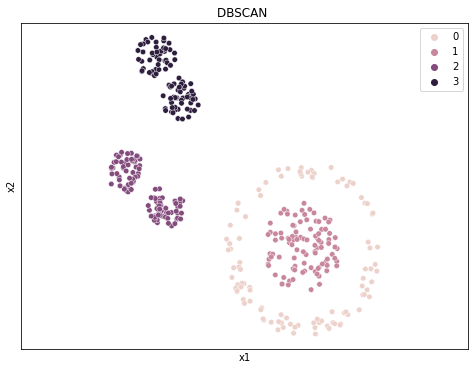

In [17]:
X = pd.DataFrame(StandardScaler().fit_transform(df),columns = ['x1','x2'])


dbscan_clf=DBSCAN(eps=0.301
                  , min_samples=1
                  , metric='euclidean'
                  , metric_params=None
                  , algorithm='auto'
                  , leaf_size=1
                  , p=None
                  , n_jobs=None).fit(X)


y_pred = dbscan_clf.labels_ 
#y_pred
plt.figure(figsize = (8,6))
sns.scatterplot(X.x1, X.x2, hue = y_pred, s =  30, alpha=1)

plt.axis('equal')

title = 'DBSCAN '
plt.title(title)
plt.xticks([])
plt.yticks([])
plt.show()

<font color='red'>Assignment:</font> Tune hyperparameters to make the clustering results more reasonable.

<font color='red'>Question:</font> How does **DBSCAN** work?

https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/#:~:text=DBSCAN%20is%20a%20density%2Dbased,points%20into%20a%20single%20cluster.

https://www.tutorialspoint.com/what-is-the-difference-between-k-means-and-dbscan#:~:text=K%2Dmeans%20needs%20a%20prototype,influenced%20by%20noise%20or%20outliers.

DBSCAN checks for clusters by checking the ε-neighborhood of every point in the database. If the ε-neighborhood of a point p contains more than MinPts, a new cluster with p as a core element is produced. DBSCAN iteratively assemble precisely density-reachable objects from these essential element, which can include the merge of a few density-reachable clusters. The process eliminates when no new point can be added to any cluster.


<font color='red'>Question:</font> What are the important hyperparameters for **DBSCAN**? How do they affect results?

https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80

The DBSCAN algorithm basically requires 2 parameters:

eps: specifies how close points should be to each other to be considered a part of a cluster. It means that if the distance between two points is lower or equal to this value (eps), these points are considered neighbors.

minPoints: the minimum number of points to form a dense region. For example, if we set the minPoints parameter as 5, then we need at least 5 points to form a dense region.

<font color='red'>Question:</font> Do we need to set the number of clusters in **DBSCAN**? Why or why not?

DBSCAN does not require us to specify the number of clusters, avoids outliers, and works quite well with arbitrarily shaped and sized clusters. It does not have centroids, the clusters are formed by a process of linking neighbor points together.